In [1]:
import mahotas

# Declare a class descriptor for computing the moments of the images

In [2]:
class ZernikeMoments:
    def __init__(self, radius):
    #Store the size of the radius used while computing the moments of the image
        self.radius = radius
    
    def describe(self, image):
        #Return the zernike moments for the image
        return mahotas.features.zernike_moments(image, self.radius)    

Import the libraries

In [3]:
import numpy as np
import _pickle as cPickle
import glob
import cv2

Initialize the descriptor with a radius of 21 and store the moments in dict

In [4]:
desc = ZernikeMoments(21)
index = {}

Load an image from the given file path

In [5]:
image = cv2.imread('/home/anirudh/wav2img.png')

In [6]:
image.shape

(280, 1800, 3)

Convert the image from 1 colorspace to another(Grayspace)

In [7]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [23]:
image.shape

(280, 1800)

Pad the image with extra white pixels to ensure the edges of the pokemon are not up against the borders of the image

In [24]:
image = cv2.copyMakeBorder(image, 15,15,15,15, cv2.BORDER_CONSTANT,value = 255)

In [25]:
image.shape

(310, 1830)

Invert the image and threshold it

In [26]:
thresh = cv2.bitwise_not(image)

In [27]:
thresh.shape

(310, 1830)

In [28]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [29]:
thresh[thresh > 0] = 255

In [30]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Initialize the outline image, find the outermost contours( the outline ) of the pokemon and draw it

In [31]:
outline = np.zeros(image.shape, dtype= "uint8")

In [32]:
outline.shape

(310, 1830)

findContours( image, mode,contours) -> image,contours,hierarchy

RETR_EXTERNAL: Find only the outermost contours

CHAIN_APPROX_SIMPLE: compress and approximate the contours to save the memory

In [33]:
_,cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [34]:
cnts[0].shape

(4, 1, 2)

**Hierarchy**: Sometimes, shapes are inside other shapes in an image. In these cases, we call the external shape as parent shape and and internal one as the child shape. We have assigned a hierarchy for these images

[Hierarchy](https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html)

In [35]:
cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]

In [36]:
cnts.shape

(4, 1, 2)

In [37]:
cv2.drawContours(outline, [cnts],-1, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Compute the Zernike moments of the shape of the outline

In [38]:
moments = desc.describe(outline)

In [39]:
moments

array([3.18309886e-01, 4.67550711e-18, 7.09795743e-03, 1.26524258e-16,
       4.63273858e-18, 3.34812266e-18, 1.14045122e-02, 1.02330189e-16,
       4.89346587e-03, 4.57924450e-18, 3.12150185e-18, 1.11070941e-17,
       1.50338433e-02, 8.14478192e-17, 6.63415095e-03, 1.93663514e-17,
       2.54635798e-18, 4.49441658e-18, 3.08677798e-18, 7.02845943e-18,
       1.76504557e-02, 4.47535040e-17, 8.06051157e-03, 5.36686337e-18,
       5.13944149e-03])

In [40]:
index['wav2png'] = moments

In [41]:
img = cv2.imread('/home/anirudh/wav2img.png',0)

In [42]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [44]:
cv2.imwrite('wavgray.png',img)

True

In [45]:
from matplotlib import pyplot as plt

In [46]:
img = cv2.imread('/home/anirudh/wav2img.png',0)

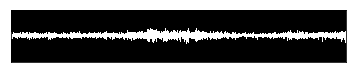

In [47]:
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [48]:
cap = cv2.VideoCapture(0)

In [49]:
img = np.zeros((512,512,3), np.uint8)

In [50]:
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

In [51]:
events = [i for i in dir(cv2) if 'EVENT' in i]

In [52]:
img = cv2.imread('/home/anirudh/wav2img.png')

In [53]:
px = img[100,100]

In [54]:
print(px)

[0 0 0]


In [55]:
blue = img[100,100,0]

In [56]:
desc = ZernikeMoments(21)
dataset = {}

In [59]:
filename = "wav2img.png"
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0,0.04)

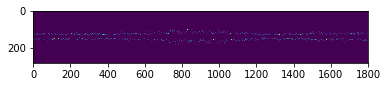

In [60]:
plt.imshow(dst)

In [61]:
%pwd

'/home/anirudh'

In [62]:
import cv2

In [70]:
image = cv2.imread("/home/anirudh/wav2img.png",0)

In [72]:
image.shape

(280, 1800)

In [65]:
image.shape

(280, 1800, 3)

In [66]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [67]:
image.shape

(280, 1800)

In [11]:
from matplotlib import pyplot as plt

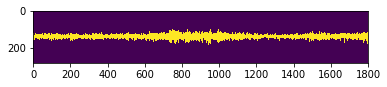

In [12]:
plt.imshow(image)

In [79]:
imagecol = cv2.imread('wav2img.png')

In [80]:
imagegray = cv2.cvtColor(imagecol, cv2.COLOR_BGR2GRAY)

In [81]:
imagegray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [82]:
imagegray.shape

(280, 1800)

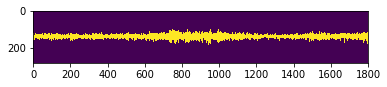

In [86]:
plt.imshow(imagegray)

In [87]:
imgborder = cv2.copyMakeBorder(imagegray,15,15,15,15,cv2.BORDER_CONSTANT, value = 255)

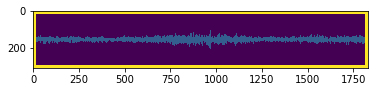

In [88]:
plt.imshow(imgborder)

In [89]:
threshImg = cv2.bitwise_not(imagecol)

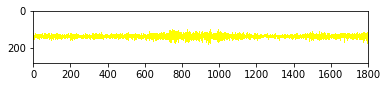

In [90]:
plt.imshow(threshImg)

In [91]:
threshImgGray = cv2.bitwise_not(imagegray) 

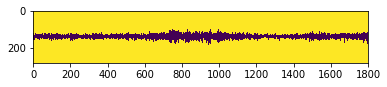

In [92]:
plt.imshow(threshImgGray)

In [94]:
threshImg.shape

(280, 1800, 3)

In [95]:
threshImg[threshImg > 0] = 255

In [96]:
threshImg

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [97]:
outlineImg = np.zeros(imagecol.shape, dtype="uint8")

In [98]:
outlineImg.shape

(280, 1800, 3)

In [105]:
outlineGr = np.zeros(imagegray.shape, dtype="uint8")

In [106]:
outlineGr.shape

(280, 1800)

In [107]:
_,cnts,hierarchy = cv2.findContours(threshImgGray.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [111]:
cntsArr = sorted(cnts,key=cv2.contourArea,reverse=True)[0]

In [114]:
cv2.drawContours(outlineGr,[cntsArr],-1,255,-1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [115]:
momentsGr = desc.describe(outlineGr)

In [120]:
import os

# Testing the pokemon zernike descriptor dataset

In [172]:
os.chdir('/home/anirudh/Desktop/pokedex-zernike/sprites/')

In [173]:
%pwd

'/home/anirudh/Desktop/pokedex-zernike/sprites'

In [174]:
image = cv2.imread("abra.png")

In [175]:
image.shape

(56, 56, 3)

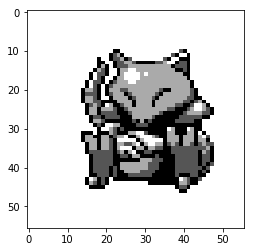

In [176]:
plt.imshow(image)

In [177]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

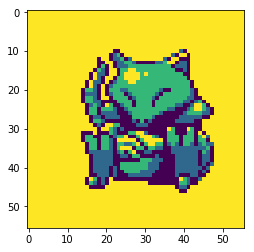

In [178]:
plt.imshow(image)

In [179]:
image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT,value = 255)

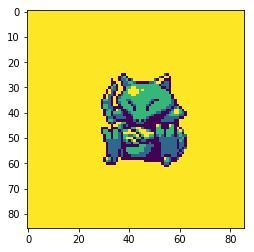

In [180]:
plt.imshow(image)

In [181]:
thresh = cv2.bitwise_not(image)

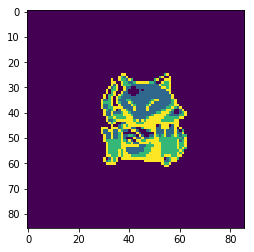

In [182]:
plt.imshow(thresh)

In [183]:
thresh[thresh > 0] = 255

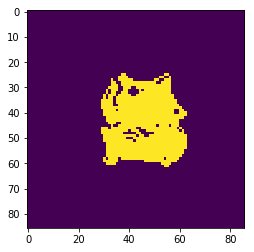

In [184]:
plt.imshow(thresh)

In [185]:
outline = np.zeros(image.shape, dtype= "uint8")

In [186]:
_,cnts,_ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [187]:
cnts = sorted(cnts,key= cv2.contourArea,reverse=True)[0]

In [188]:
cnts

array([[[37, 25]],

       [[36, 26]],

       [[36, 27]],

       [[37, 28]],

       [[37, 29]],

       [[38, 30]],

       [[38, 31]],

       [[35, 34]],

       [[34, 33]],

       [[34, 32]],

       [[35, 31]],

       [[35, 29]],

       [[33, 27]],

       [[33, 29]],

       [[31, 31]],

       [[31, 32]],

       [[30, 33]],

       [[30, 34]],

       [[29, 35]],

       [[29, 38]],

       [[30, 39]],

       [[30, 41]],

       [[31, 42]],

       [[31, 43]],

       [[33, 45]],

       [[33, 46]],

       [[32, 47]],

       [[31, 46]],

       [[29, 46]],

       [[29, 48]],

       [[30, 49]],

       [[30, 51]],

       [[31, 52]],

       [[31, 57]],

       [[30, 58]],

       [[30, 59]],

       [[31, 60]],

       [[34, 60]],

       [[35, 59]],

       [[35, 58]],

       [[36, 57]],

       [[37, 58]],

       [[45, 58]],

       [[46, 59]],

       [[52, 59]],

       [[54, 61]],

       [[55, 61]],

       [[57, 59]],

       [[58, 59]],

       [[61, 56]],



In [189]:
cv2.drawContours(outline,[cnts],-1,255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [190]:
moments = desc.describe(outline)

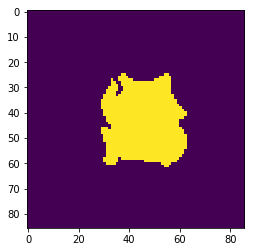

In [191]:
plt.imshow(outline)

 # Test if the process is same for a waveform image

In [192]:
os.chdir('/home/anirudh/')

In [193]:
image = cv2.imread("wav2img.png")

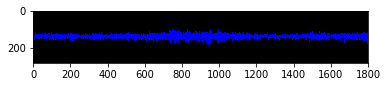

In [194]:
plt.imshow(image)

In [195]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

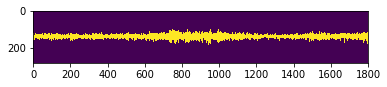

In [196]:
plt.imshow(image)

In [197]:
image = cv2.copyMakeBorder(image, 15,15,15,15,cv2.BORDER_CONSTANT, value = 255)

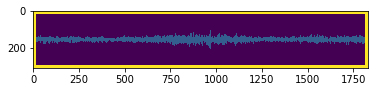

In [198]:
plt.imshow(image)

In [199]:
thresh = cv2.bitwise_not(image)

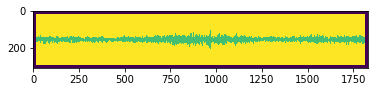

In [200]:
plt.imshow(thresh)

In [201]:
outline = np.zeros(image.shape,dtype= "uint8")

In [202]:
_,cnts,_ = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [203]:
cnts = sorted(cnts,key= cv2.contourArea, reverse= True)[0]

In [204]:
cnts

array([[[  15,   15]],

       [[  15,  294]],

       [[1814,  294]],

       [[1814,   15]]], dtype=int32)

In [205]:
cv2.drawContours(outline,[cnts],-1,255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [208]:
moments = desc.describe(thresh)

In [209]:
moments

array([0.31830989, 0.00337448, 0.01243835, 0.02069252, 0.00439612,
       0.00719964, 0.00350934, 0.00322962, 0.01917352, 0.00815984,
       0.00717363, 0.01070421, 0.00689443, 0.00370373, 0.00541761,
       0.00726583, 0.00893635, 0.00387236, 0.00687935, 0.01842864,
       0.00190954, 0.00519749, 0.00495682, 0.0051904 , 0.00634871])

# Preparing the Zernike descriptors dataset

In [228]:
index = 0
for path in glob.glob('/home/anirudh/Desktop/OUR project images/' + "/*.png"):
    imgName = (path.split('/')[-1]).replace(".png","")
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image from RGB to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with extra white pixels
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
        
    #Initialize the outline image, find the outermost contours(outline) of the pokemon, then draw it
    outline = np.zeros(image.shape, np.uint8)
        
    _,cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    dataset[imgName] = moments
    imageNames.insert(index,imgName)
    index += 1

# Test on one image

In [21]:
import os
import matplotlib.pyplot as plt

In [12]:
os.chdir('/home/anirudh/Desktop/OUR project images/drilling')

In [13]:
%pwd

'/home/anirudh/Desktop/OUR project images/drilling'

In [14]:
image = cv2.imread('518.png')

In [15]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [16]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [17]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
image.shape

(288, 432)

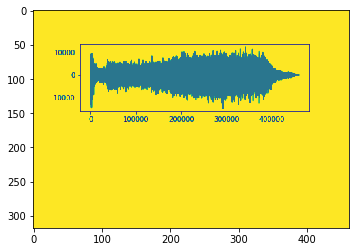

In [22]:
plt.imshow(image)

In [23]:
image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)

In [24]:
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

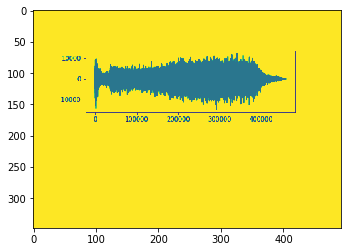

In [25]:
plt.imshow(image)

In [26]:
thresh = cv2.bitwise_not(image)

In [27]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

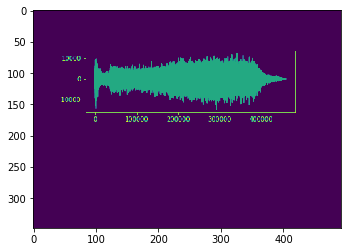

In [28]:
plt.imshow(thresh)

In [29]:
outline = np.zeros(image.shape,np.uint8)

In [30]:
outline

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [31]:
_,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [32]:
cnts

[array([[[358, 170]],
 
        [[358, 177]],
 
        [[362, 177]],
 
        [[362, 176]],
 
        [[363, 175]],
 
        [[365, 177]],
 
        [[368, 177]],
 
        [[369, 176]],
 
        [[370, 176]],
 
        [[371, 177]],
 
        [[374, 177]],
 
        [[376, 175]],
 
        [[377, 176]],
 
        [[377, 177]],
 
        [[381, 177]],
 
        [[381, 170]],
 
        [[377, 170]],
 
        [[377, 171]],
 
        [[376, 172]],
 
        [[374, 170]],
 
        [[371, 170]],
 
        [[370, 171]],
 
        [[369, 171]],
 
        [[368, 170]],
 
        [[365, 170]],
 
        [[363, 172]],
 
        [[362, 171]],
 
        [[362, 170]]], dtype=int32), array([[[348, 170]],
 
        [[348, 171]],
 
        [[347, 172]],
 
        [[347, 173]],
 
        [[346, 174]],
 
        [[346, 175]],
 
        [[348, 175]],
 
        [[349, 176]],
 
        [[349, 177]],
 
        [[350, 177]],
 
        [[350, 176]],
 
        [[351, 175]],
 
        [[352, 176]],
 
    

In [33]:
cnts = sorted(cnts,key=cv2.contourArea, reverse=True)[0]

In [34]:
cnts

array([[[ 84,  65]],

       [[ 84,  76]],

       [[ 83,  77]],

       [[ 81,  77]],

       [[ 83,  77]],

       [[ 84,  78]],

       [[ 84, 109]],

       [[ 83, 110]],

       [[ 81, 110]],

       [[ 83, 110]],

       [[ 84, 111]],

       [[ 84, 142]],

       [[ 83, 143]],

       [[ 81, 143]],

       [[ 83, 143]],

       [[ 84, 144]],

       [[ 84, 163]],

       [[ 98, 163]],

       [[ 99, 164]],

       [[ 99, 167]],

       [[ 99, 164]],

       [[100, 163]],

       [[165, 163]],

       [[166, 164]],

       [[166, 167]],

       [[166, 164]],

       [[167, 163]],

       [[231, 163]],

       [[232, 164]],

       [[232, 167]],

       [[232, 164]],

       [[233, 163]],

       [[297, 163]],

       [[298, 164]],

       [[298, 167]],

       [[298, 164]],

       [[299, 163]],

       [[363, 163]],

       [[364, 164]],

       [[364, 167]],

       [[364, 164]],

       [[365, 163]],

       [[419, 163]],

       [[419,  65]]], dtype=int32)

In [36]:
cv2.drawContours(outline, [cnts],-1,255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
moments = desc.describe(thresh)

In [38]:
moments

array([0.31830989, 0.00141876, 0.00109114, 0.002908  , 0.00290244,
       0.00216102, 0.00188277, 0.00467153, 0.00197629, 0.00451589,
       0.00335614, 0.00518535, 0.00277594, 0.00615583, 0.00268658,
       0.00437002, 0.00631658, 0.00464248, 0.00714014, 0.009247  ,
       0.0038185 , 0.00722839, 0.00328881, 0.00584406, 0.00305053])

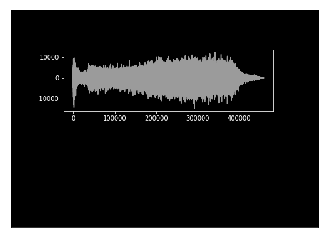

In [40]:
plt.imshow(thresh,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

# Preparing the drilling(i.e. positive examples)

index = 0
for path in glob.glob('/home/anirudh/Desktop/OUR project images/' + "/*.png"):
    imgName = (path.split('/')[-1]).replace(".png","")
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image from RGB to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with extra white pixels
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
        
    #Initialize the outline image, find the outermost contours(outline) of the waveform, then draw it
    outline = np.zeros(image.shape, np.uint8)
        
    _,cnts,hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    dataset[imgName] = moments
    imageNames.insert(index,imgName)
    index += 1

In [49]:
drillingFeatures = {}
drillingLabels = []

In [50]:
index = 0
for path in glob.glob('/home/anirudh/Desktop/OUR project images/drilling' + "/*.png"):
    
    imgName = (path.split('/')[-1].replace(".png",""))
    
    #Load the image from the file
    image = cv2.imread(path)
    
    #Convert the image to Gray
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #Pad the image with pixels to prevent overlapping at edges
    image = cv2.copyMakeBorder(image,15,15,15,15, cv2.BORDER_CONSTANT, value = 255)
    
    #Invert the image and threshold it
    thresh = cv2.bitwise_not(image)
    
    #Initialize the outline image, find the outermost contours of the waveform and plot it
    outline = np.zeros(image.shape, np.uint8)
    
    _,cnts,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key= cv2.contourArea, reverse= True)[0]
    cv2.drawContours(outline, [cnts],-1,255,-1)
    
    moments = desc.describe(thresh)
    drillingFeatures[imgName] = moments
    drillingLabels.insert(index,imgName)
    index += 1

In [52]:
len(drillingFeatures)

83

In [54]:
drillingLabels

['118278',
 '165786',
 '71088',
 '165643',
 '74922',
 '17913',
 '29722',
 '107842',
 '57584',
 '50415',
 '147764',
 '165644',
 '14110',
 '14111',
 '57696',
 '130961',
 '156362',
 '84699',
 '34621',
 '165642',
 '74965',
 '99192',
 '71079',
 '29721',
 '14115',
 '180029',
 '14113',
 '34643',
 '165640',
 '127443',
 '50416',
 '71082',
 '205874',
 '147019',
 '140824',
 '181624',
 '146244',
 '104625',
 '42324',
 '71080',
 '58937',
 '39532',
 '66622',
 '71086',
 '165645',
 '165641',
 '50414',
 '127538',
 '179212',
 '167750',
 '14114',
 '69598',
 '139000',
 '167702',
 '165785',
 '71087',
 '50413',
 '31884',
 '39533',
 '144351',
 '71171',
 '89099',
 '166931',
 '205610',
 '58005',
 '63095',
 '55020',
 '135849',
 '205878',
 '77751',
 '104817',
 '168037',
 '103357',
 '187863',
 '46668',
 '71529',
 '137815',
 '146249',
 '128607',
 '46669',
 '167701',
 '199929',
 '518']